In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
artworks = pd.read_csv('https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv')

In [3]:
artworks.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')

In [4]:
# Select Columns.
artworks = artworks[['Artist', 'Nationality', 'Gender', 'Date', 'Department',
                    'DateAcquired', 'URL', 'ThumbnailURL', 'Height (cm)', 'Width (cm)']]

# Convert URL's to booleans.
artworks['URL'] = artworks['URL'].notnull()
artworks['ThumbnailURL'] = artworks['ThumbnailURL'].notnull()

# Drop films and some other tricky rows.
artworks = artworks[artworks['Department']!='Film']
artworks = artworks[artworks['Department']!='Media and Performance Art']
artworks = artworks[artworks['Department']!='Fluxus Collection']

# Drop missing data.
artworks = artworks.dropna()

In [5]:
artworks.head()

,Artist,Nationality,Gender,Date,Department,DateAcquired,URL,ThumbnailURL,Height (cm),Width (cm)
0,Otto Wagner,(Austrian),(Male),1896,Architecture & Design,1996-04-09,True,True,48.6000,168.9000
1,Christian de Portzamparc,(French),(Male),1987,Architecture & Design,1995-01-17,True,True,40.6401,29.8451
2,Emil Hoppe,(Austrian),(Male),1903,Architecture & Design,1997-01-15,True,True,34.3000,31.8000
3,Bernard Tschumi,(),(Male),1980,Architecture & Design,1995-01-17,True,True,50.8000,50.8000
4,Emil Hoppe,(Austrian),(Male),1903,Architecture & Design,1997-01-15,True,True,38.4000,19.1000


In [6]:
artworks.dtypes

Artist           object
Nationality      object
Gender           object
Date             object
Department       object
DateAcquired     object
URL                bool
ThumbnailURL       bool
Height (cm)     float64
Width (cm)      float64
dtype: object

In [7]:
artworks['DateAcquired'] = pd.to_datetime(artworks.DateAcquired)
artworks['YearAcquired'] = artworks.DateAcquired.dt.year
artworks['YearAcquired'].dtype

dtype('int64')

In [8]:
# Remove multiple nationalities, genders, and artists.
artworks.loc[artworks['Gender'].str.contains('\) \('), 'Gender'] = '\(multiple_persons\)'
artworks.loc[artworks['Nationality'].str.contains('\) \('), 'Nationality'] = '\(multiple_nationalities\)'
artworks.loc[artworks['Artist'].str.contains(','), 'Artist'] = 'Multiple_Artists'

# Convert dates to start date, cutting down number of distinct examples.
artworks['Date'] = pd.Series(artworks.Date.str.extract(
    '([0-9]{4})', expand=False))[:-1]

# Final column drops and NA drop.
X = artworks.drop(['Department', 'DateAcquired', 'Artist', 'Nationality', 'Date'], 1)

# Create dummies separately.
artists = pd.get_dummies(artworks.Artist)
nationalities = pd.get_dummies(artworks.Nationality)
dates = pd.get_dummies(artworks.Date)

# Concat with other variables, but artists slows this wayyyyy down so we'll keep it out for now
X = pd.get_dummies(X, sparse=True)
X = pd.concat([X, nationalities, dates], axis=1)

Y = artworks.Department

In [9]:
# Alright! We've done our prep, let's build the model.
# Neural networks are hugely computationally intensive.
# This may take several minutes to run.

# Import the model.
from sklearn.neural_network import MLPClassifier

In [10]:
# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(X, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [11]:
fs1 = mlp.score(X, Y)

In [12]:
Y.value_counts()/len(Y)

Prints & Illustrated Books    0.522030
Photography                   0.229482
Architecture & Design         0.111071
Drawings                      0.103175
Painting & Sculpture          0.034242
Name: Department, dtype: float64

In [31]:
fs1

0.7089633656165065

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
cvs1 = cross_val_score(mlp, X, Y, cv=5)

In [34]:
cvs1

array([0.59446916, 0.64677736, 0.34508828, 0.31975882, 0.40165582])

# Smaller network (100 nodes)

In [15]:
mlp2 = MLPClassifier(hidden_layer_sizes=(100,))
mlp2.fit(X,Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [16]:
fs2 = mlp2.score(X,Y)

In [35]:
cvs2 = cross_val_score(mlp2, X, Y, cv=5)

# Even smaller network (10 nodes)

In [18]:
mlp3 = MLPClassifier(hidden_layer_sizes=(10,))
mlp3.fit(X,Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [19]:
fs3 = mlp3.score(X,Y)

In [20]:
fs3

0.6552750449795199

In [36]:
cvs3 = cross_val_score(mlp3, X, Y, cv=5)

# Use sigmoid activation function

In [37]:
mlp4 = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic')
mlp4.fit(X,Y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [38]:
fs4 = mlp4.score(X,Y)

In [39]:
cvs4 = cross_val_score(mlp4, X, Y, cv=5)

# Apply some regularization (alpha=0.1)

In [40]:
mlp5 = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', alpha=0.1)
mlp5.fit(X,Y)

MLPClassifier(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [41]:
fs5 = mlp5.score(X,Y)

In [42]:
cvs5 = cross_val_score(mlp5, X, Y, cv=5)

# Let's try 2 layers

In [43]:
mlp6 = MLPClassifier(hidden_layer_sizes=(100,100))
mlp6.fit(X,Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [44]:
fs6 = mlp6.score(X,Y)

In [45]:
cvs6 = cross_val_score(mlp6, X, Y, cv=5)

# 2 layers with sigmoid activation function

In [46]:
mlp7 = MLPClassifier(hidden_layer_sizes=(100,100), activation='logistic')
mlp7.fit(X,Y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [47]:
fs7 = mlp7.score(X,Y)

In [48]:
cvs7 = cross_val_score(mlp7, X, Y, cv=5)

# Comparative performance analysis

In [49]:
fs = [fs1, fs2, fs3, fs4, fs5, fs6, fs7]
cvs = [cvs1, cvs2, cvs3, cvs4, cvs5, cvs6, cvs7]
variant = ['1000', '100', '10', '100_Sigmoid', '100_Sigmoid_alpha_0.1','100_100', '100_100_Sigmoid']

In [50]:
for ii in range(len(fs)):
    auxFs = fs[ii]
    auxCvs = cvs[ii]
    auxVar = variant[ii]
    print('For variant: '+auxVar)
    print('Full sample score: {}'.format(auxFs))
    print('Cross validation score mean: {}'.format(np.mean(auxCvs)))
    print(sorted(auxCvs))

For variant: 1000
Full sample score: 0.7089633656165065
Cross validation score mean: 0.4615498880019492
[0.3197588170550797, 0.3450882817359682, 0.40165581929555894, 0.5944691641548251, 0.6467773577683142]
For variant: 100
Full sample score: 0.6200666079699881
Cross validation score mean: 0.5326558609122723
[0.34973200612557426, 0.5145236158300235, 0.5221780946456768, 0.6020286110712406, 0.6748169768888463]
For variant: 10
Full sample score: 0.6552750449795199
Cross validation score mean: 0.5546924393834591
[0.5028470261735011, 0.5355091883614089, 0.5536679906206633, 0.5637050858810583, 0.6177329058806641]
For variant: 100_Sigmoid
Full sample score: 0.7226199134861999
Cross validation score mean: 0.5811134085893747
[0.49401799387442574, 0.5305038518589407, 0.5892233334928458, 0.6074350509544998, 0.6843868127661611]
For variant: 100_Sigmoid_alpha_0.1
Full sample score: 0.6511598974084141
Cross validation score mean: 0.5600017061901532
[0.48210183767228176, 0.5375376812287669, 0.54663348

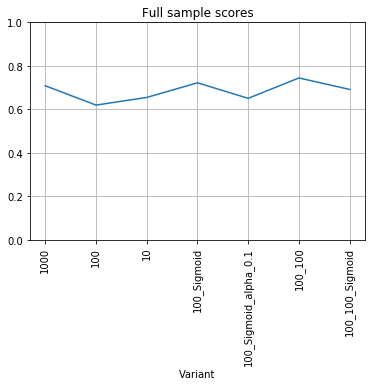

In [58]:
plt.plot(range(len(fs)), fs)
plt.title('Full sample scores')
plt.xlabel('Variant')
plt.xticks(range(len(fs)), variant, rotation=90)
plt.grid(b='on')
plt.ylim([0,1.0])
plt.show()

In [64]:
variant2 = variant.copy()

In [67]:
variant2.insert(0,'')

In [72]:
fs2 = fs.copy()
fs2.insert(0, np.nan)

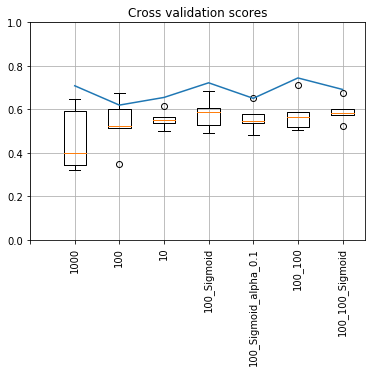

In [75]:
plt.boxplot(cvs)
plt.plot(range(len(fs2)), fs2)
plt.title('Cross validation scores')
plt.xticks(range(len(cvs)+1), variant2, rotation=90)
plt.grid(b='on')
plt.ylim([0,1.0])
plt.show()

# Observations and questions
1. It seems that smaller number of nodes gives better cross validation score and less overfitting (compare full sample score to median score). Any reason for this?
2. Everything else seems to be more or less the same.
3. The regularized version does seem to do less overfitting (relative narrowness of the distribution) than the un-regularized version.  